In [ ]:
import pandas as pd

res_folder='../data/predicted/'
df=pd.read_csv(res_folder+'values_predicted.csv', sep="|", encoding ='utf-8')
df.drop('Unnamed: 0', axis=1, inplace=True)

In [3]:
print ('unique users number: ', len(df.user_idh.unique()))

unique users number:  53606


In [4]:
import json

json_path = "../models/xlm-roberta-large/xlm-roberta-large_thresholds.json"

# load JSON do dict
with open(json_path, "r") as f:
    thresholds = json.load(f)

print(thresholds)

{'Self-direction': 0.324, 'Stimulation': 0.241, 'Hedonism': 0.357, 'Achievement': 0.344, 'Power': 0.441, 'Security': 0.41, 'Conformity': 0.199, 'Tradition': 0.264, 'Benevolence': 0.465, 'Universalism': 0.425, 'GLOBAL': 0.34}


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

thresholds.pop("GLOBAL", None)

values_list = list(thresholds.keys())

# Создаём словарь для итогов
results = {}

for value in values_list:
    probs = df[value]
    threshold = thresholds[value]
    
    mean_prob = probs.mean()
    std_prob = probs.std()
    median_prob = probs.median()
    q1_prob = probs.quantile(0.25)
    q3_prob = probs.quantile(0.75)
    proportion = (probs > threshold).mean()*100
    
    results[value] = {
        "Mean (SD)": f"{mean_prob:.3f} ({std_prob:.3f})",
        "Median [Q1–Q3]": f"{median_prob:.3f} [{q1_prob:.3f}-{q3_prob:.3f}]",#     round(median_prob, 3),
        "Share of posts (%)": round(proportion, 1),
        "Threshold": round(threshold, 3)
    }

# Переводим в DataFrame
results_df = pd.DataFrame.from_dict(results, orient="index")

results_df

,Mean (SD),Median [Q1–Q3],Share of posts (%),Threshold
Self-direction,0.354 (0.315),0.237 [0.076-0.618],42.7,0.324
Stimulation,0.174 (0.246),0.051 [0.017-0.219],23.5,0.241
Hedonism,0.136 (0.195),0.046 [0.015-0.166],12.8,0.357
Achievement,0.128 (0.218),0.031 [0.011-0.119],12.3,0.344
Power,0.089 (0.218),0.009 [0.004-0.035],7.7,0.441
Security,0.119 (0.223),0.021 [0.008-0.091],10.5,0.410
Conformity,0.064 (0.139),0.012 [0.005-0.046],8.9,0.199
Tradition,0.090 (0.213),0.009 [0.003-0.039],10.2,0.264
Benevolence,0.317 (0.338),0.147 [0.034-0.590],30.1,0.465
Universalism,0.149 (0.230),0.039 [0.012-0.168],12.5,0.425


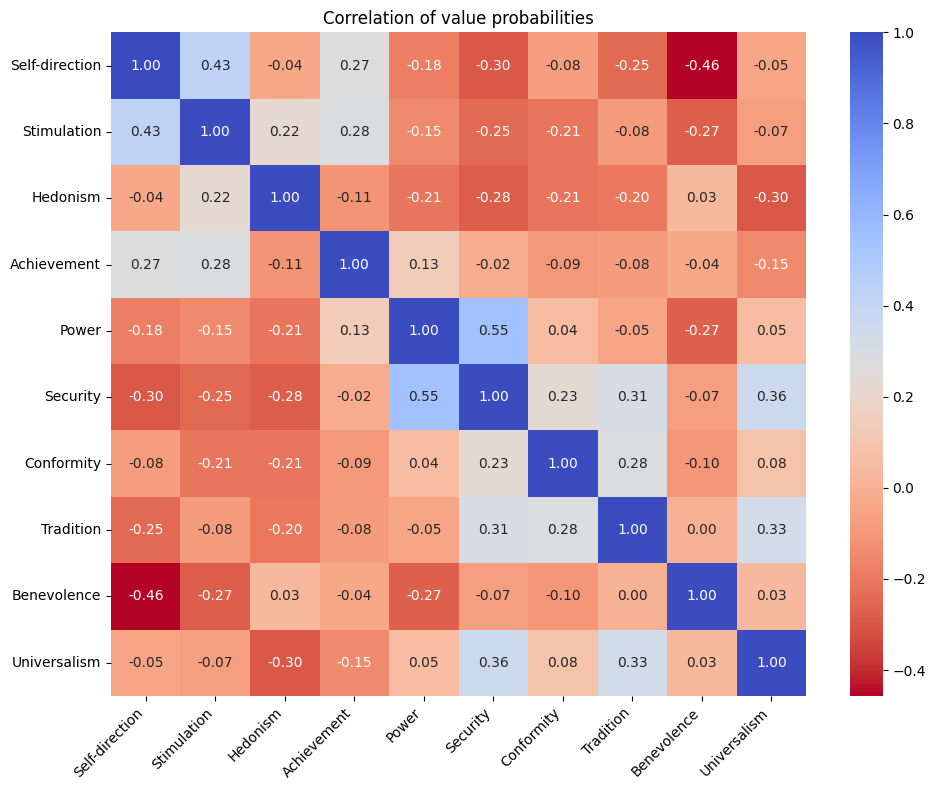

In [8]:
# Correlations

correlation_prob_matrix = df[values_list].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_prob_matrix, annot=True, fmt=".2f", cmap="coolwarm_r")
plt.title("Correlation of value probabilities")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [9]:
correlation_prob_matrix

,Self-direction,Stimulation,Hedonism,Achievement,Power,Security,Conformity,Tradition,Benevolence,Universalism
Self-direction,1.000000,0.427361,-0.040278,0.267611,-0.180769,-0.295058,-0.075771,-0.250367,-0.456563,-0.050950
Stimulation,0.427361,1.000000,0.221026,0.279295,-0.145816,-0.246497,-0.208494,-0.081201,-0.274812,-0.073394
Hedonism,-0.040278,0.221026,1.000000,-0.112557,-0.206702,-0.278557,-0.206432,-0.202227,0.031364,-0.296784
Achievement,0.267611,0.279295,-0.112557,1.000000,0.131584,-0.023887,-0.094400,-0.082814,-0.040185,-0.146749
Power,-0.180769,-0.145816,-0.206702,0.131584,1.000000,0.549781,0.044451,-0.050488,-0.271178,0.048232
Security,-0.295058,-0.246497,-0.278557,-0.023887,0.549781,1.000000,0.232840,0.310547,-0.072859,0.358334
Conformity,-0.075771,-0.208494,-0.206432,-0.094400,0.044451,0.232840,1.000000,0.282651,-0.098714,0.082791
Tradition,-0.250367,-0.081201,-0.202227,-0.082814,-0.050488,0.310547,0.282651,1.000000,0.002919,0.333337
Benevolence,-0.456563,-0.274812,0.031364,-0.040185,-0.271178,-0.072859,-0.098714,0.002919,1.000000,0.032847
Universalism,-0.050950,-0.073394,-0.296784,-0.146749,0.048232,0.358334,0.082791,0.333337,0.032847,1.000000
